# Pre-processing

Value data first 100 sample

In [ ]:
import numpy as np

file_path = 'D:\TA_baru\dataset\\all_Label\Myocardial_infarction\\anterior\patient002_s0015lre.dat'
data = np.fromfile(file_path, dtype=np.int16)
print(data[:100]) 
print("Shape:", data.shape)


[ 547  -70 -616 -238  582 -343 1360  666  782  109 -767 -396  574  -74
 -647 -250  610 -360 1338  659  826  155 -721 -360  585  -63 -648 -261
  617 -356 1329  660  863  194 -682 -338  624  -35 -658 -294  641 -347
 1305  638  881  218 -660 -323  655  -36 -690 -309  672 -363 1282  631
  900  242 -638 -307  661  -44 -704 -309  683 -374 1260  627  936  276
 -610 -283  664  -31 -693 -317  679 -362 1246  622  962  303 -587 -271
  707    0 -706 -354  707 -353 1230  610  982  321 -573 -263  722   32
 -689 -377]
Shape: (1382400,)


In [ ]:
import os
import numpy as np
from scipy.signal import butter, filtfilt, iirnotch

fs = 1000             # Sampling Rate (Hz)
n_channels = 12       # Number of Chanel ECG
input_root = r'D:\TA_baru\dataset\all_label\Myocardial_infarction'  # Input folder 
output_root = r'D:\TA_baru\dataset\all_Label_preprocessed'  # Output folder 

# Butterworth high-pass filter (dissapering baseline wander)
def butter_highpass(data, cutoff=0.5, fs=1000, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Notch filter (dissapering noise 50 Hz)
def apply_notch(data, freq=50.0, fs=1000, Q=30.0):
    nyq = 0.5 * fs
    w0 = freq / nyq
    b, a = iirnotch(w0, Q)
    return filtfilt(b, a, data)

def bandpass_filter(signal, lowcut=5.0, highcut=15.0, fs=1000, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# ===== File Processing =====

for label_folder in os.listdir(input_root):
    input_label_path = os.path.join(input_root, label_folder)
    output_label_path = os.path.join(output_root, label_folder)
    os.makedirs(output_label_path, exist_ok=True)

    for file in os.listdir(input_label_path):
        if file.endswith('.dat'):
            filename = file[:-4]  
            input_file = os.path.join(input_label_path, file)
            output_file = os.path.join(output_label_path, filename + '.npy')

            try:
                # Load data as int16
                raw = np.fromfile(input_file, dtype=np.int16)
                signals = raw.reshape(-1, n_channels)

                # Normalization into range -1 to 1
                signals = signals / 32768.0

                # Pre-process to all channel
                filtered = []
                for ch in range(n_channels):
                    sig = signals[:, ch]
                    sig = butter_highpass(sig, fs=fs)
                    sig = apply_notch(sig, fs=fs)
                    # sig = bandpass_filter(sig, fs=fs)
                    filtered.append(sig)

                # Merge and save result
                filtered = np.array(filtered).T
                np.save(output_file, filtered)
                print(f"Sukses proses dan simpan: {filename}.npy")

            except Exception as e:
                print(f"Gagal proses {file}: {e}")

print("✅ Semua file selesai diproses dan disimpan!")


Sukses proses dan simpan: patient002_s0015lre.npy
Sukses proses dan simpan: patient005_s0021are.npy
Sukses proses dan simpan: patient005_s0021bre.npy
Sukses proses dan simpan: patient005_s0025lre.npy
Sukses proses dan simpan: patient005_s0031lre.npy
Sukses proses dan simpan: patient005_s0101lre.npy
Sukses proses dan simpan: patient006_s0022lre.npy
Sukses proses dan simpan: patient006_s0027lre.npy
Sukses proses dan simpan: patient006_s0064lre.npy
Sukses proses dan simpan: patient007_s0026lre.npy
Sukses proses dan simpan: patient007_s0029lre.npy
Sukses proses dan simpan: patient007_s0038lre.npy
Sukses proses dan simpan: patient007_s0078lre.npy
Sukses proses dan simpan: patient010_s0036lre.npy
Sukses proses dan simpan: patient010_s0042lre.npy
Sukses proses dan simpan: patient010_s0061lre.npy
Sukses proses dan simpan: patient014_s0046lre.npy
Sukses proses dan simpan: patient014_s0056lre.npy
Sukses proses dan simpan: patient014_s0071lre.npy
Sukses proses dan simpan: patient020_s0062lre.npy


Visualization signal before denoised

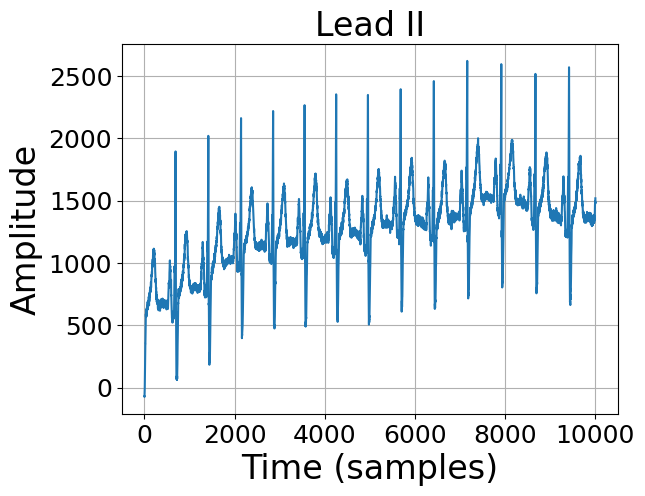

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = r'D:\TA_baru\dataset\all_Label\Myocardial_infarction\anterior\patient002_s0015lre.dat'
n_channels = 12
fs = 1000

data = np.fromfile(file_path, dtype=np.int16)
data = data.reshape(-1, n_channels)

# Plot one of the channel, for example Lead II
plt.plot(data[:10000, 1])  # first 5 second from channel 1 (lead II)
plt.title("Lead II", fontsize=24)
plt.xlabel("Time (samples)", fontsize=24)
plt.ylabel("Amplitude", fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.show()


Visualization signal After denoised

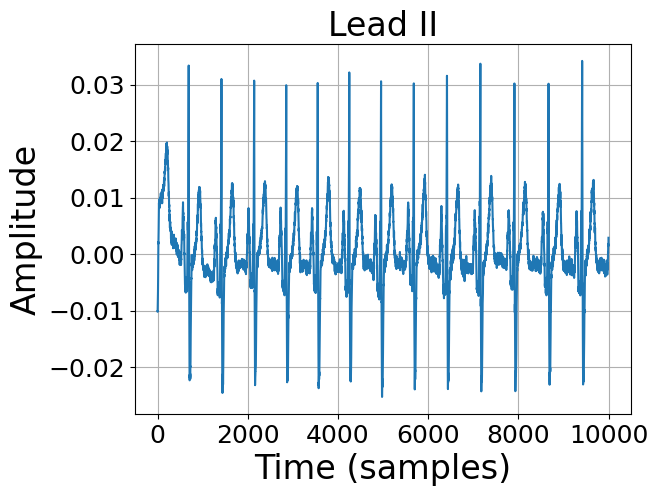

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ===== PARAMETER =====
file_path = r'D:\TA_baru\dataset\all_Label_preprocessed\anterior\patient002_s0015lre.npy'
fs = 1000  # sampling rate
duration_sec = 10  # Duration of signal that want to visualized (second)
channel_to_plot = 1  # what channel that want to look after (0-11)

# ===== LOAD dan PLOT =====
data = np.load(file_path)
samples_to_plot = duration_sec * fs

# Take signal from 1 channel
signal = data[:samples_to_plot, channel_to_plot]

# Plot
plt.plot(data[:(duration_sec*1000), channel_to_plot])  # 5 detik pertama dari channel 1
plt.title("Lead II", fontsize=24)
plt.xlabel("Time (samples)", fontsize=24)
plt.ylabel("Amplitude", fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)


Visualization denoised signal (Zoom In)

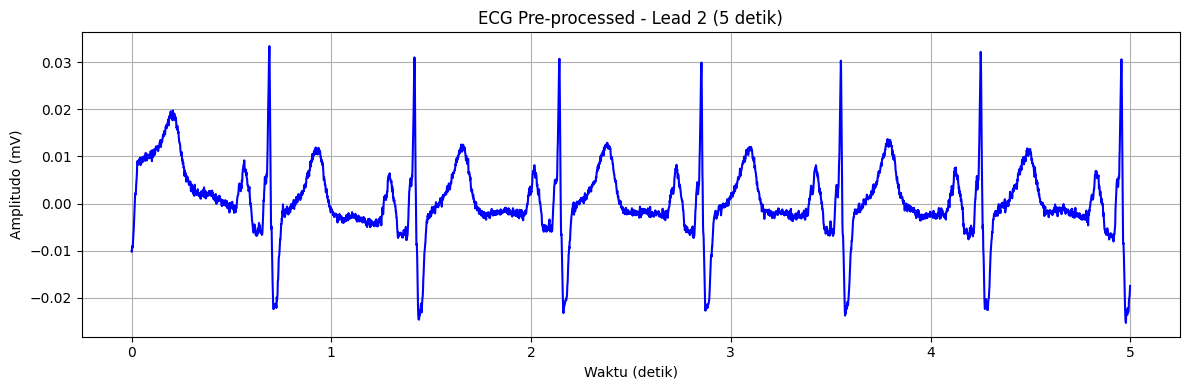

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===== PARAMETER =====
file_path = r'D:\TA_baru\dataset\all_Label_preprocessed\anterior\patient002_s0015lre.npy'
fs = 1000  # sampling rate
duration_sec = 5  # Duration of signal that want to visualized (second)
channel_to_plot = 1  # what channel that want to look after (0-11)

# ===== LOAD dan PLOT =====
data = np.load(file_path)  
samples_to_plot = duration_sec * fs

# Ambil sinyal dari 1 channel
signal = data[:samples_to_plot, channel_to_plot]

# Plot
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(signal)) / fs, signal, color='blue')
plt.title(f"ECG Pre-processed - Lead {channel_to_plot+1} ({duration_sec} detik)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo (mV)")
plt.grid(True)
plt.tight_layout()
plt.show()


# R-peak Detection pakai Algoritma Pan-Topmkins

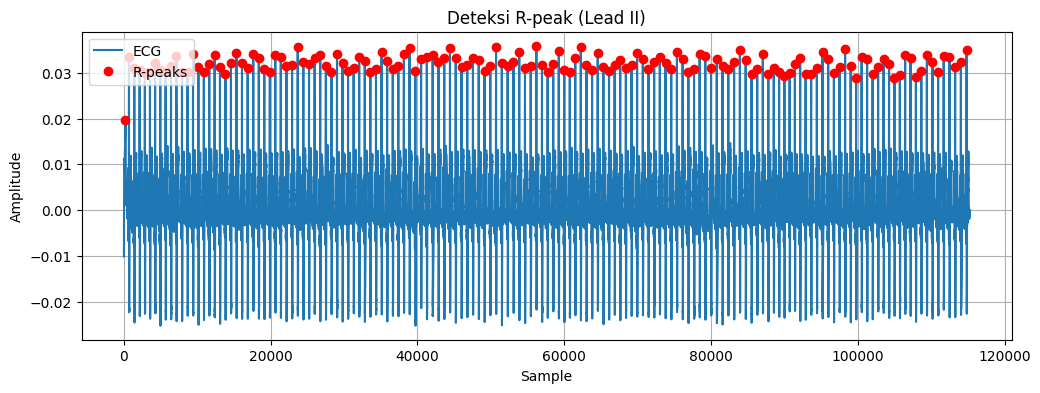

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statistics import mean

def detect_r_peaks(ecg, fs=1000):
    # Make signal into an absolute value (optional depend the shape of signal)
    signal = np.abs(ecg)

    # Use find_peaks from library to search all candidate of peak (low initial threshold)
    distance = int(0.3 * fs)  # minimal 300 ms between peak
    candidate_peaks, _ = find_peaks(signal, distance=distance)

    r_peaks = []
    noise_peaks = []
    rr_intervals = []
    SPKI = max(signal) * 0.25  # average QRS peak amplitude
    NPKI = NPKI = mean(signal) * 0.5  # average noise peak amplitude
    threshold_I1 = 0
    threshold_I2 = 0
    recent_rr = []

    for idx, peak in enumerate(candidate_peaks):
        peak_val = signal[peak]

        # Update threshold
        threshold_I1 = NPKI + 0.25 * (SPKI - NPKI)
        threshold_I2 = 0.5 * threshold_I1

        # Check is peak > main threshold
        if peak_val > threshold_I1:
            # if distance between peak quite far (min 360 ms and not too close to previously)
            if len(r_peaks) == 0 or (peak - r_peaks[-1]) > 0.36 * fs:
                r_peaks.append(peak)
                SPKI = 0.125 * peak_val + 0.875 * SPKI
                # Calculate RR interval
                if len(r_peaks) >= 2:
                    rr_interval = peak - r_peaks[-2]
                    rr_intervals.append(rr_interval)
                    recent_rr = rr_intervals[-8:]
        else:
            # Detect as noise
            noise_peaks.append(peak)
            NPKI = 0.125 * peak_val + 0.875 * NPKI

        # Rule (c): Recovery mode
        if len(r_peaks) > 0 and len(recent_rr) >= 1:
            last_rr = np.mean(recent_rr)
            if (peak - r_peaks[-1]) > 1.5 * last_rr:
                # find new peak that larger from threshold_I2 and distance minimal 360 ms
                if peak_val > threshold_I2 and (peak - r_peaks[-1]) > 0.36 * fs:
                    r_peaks.append(peak)
                    SPKI = 0.25 * peak_val + 0.75 * SPKI
                    rr_intervals.append(peak - r_peaks[-2])
                    recent_rr = rr_intervals[-8:]

    return np.array(r_peaks), threshold_I1

# ========== Main ==========
file_path = r'D:\TA_baru\dataset\all_Label_preprocessed\anterior\patient002_s0015lre.npy'
data = np.load(file_path)
lead = data[:, 1]  # misalnya channel 2 (Lead II)

r_peaks, threshold = detect_r_peaks(lead)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(lead, label='ECG')
plt.plot(r_peaks, lead[r_peaks], 'ro', label='R-peaks')
plt.title("Deteksi R-peak (Lead II)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


Jumlah R-peak dalam 5 detik: 8


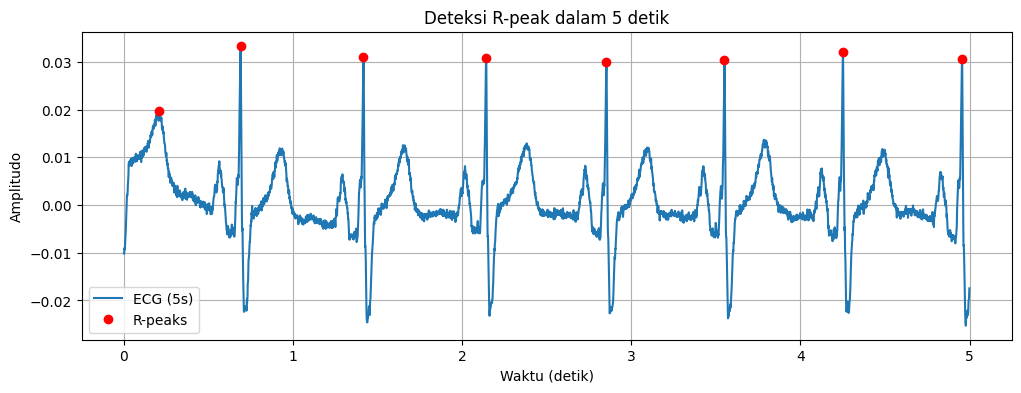

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = r'D:\TA_baru\dataset\all_Label_preprocessed\anterior\patient002_s0015lre.npy'
data = np.load(file_path)
lead = data[:, 1]  # Lead II (channel 1)

fs = 1000          # sampling rate 1000 Hz
durasi = 5         # seconds
n_samples = fs * durasi

# Take first 5 seconds
lead_5s = lead[:n_samples]

# Detect R-peak in segment 5 seconds
r_peaks_5s, _ = detect_r_peaks(lead_5s, fs=fs)

# Print result
print(f"Jumlah R-peak dalam 5 detik: {len(r_peaks_5s)}")

# visualization
plt.figure(figsize=(12, 4))
plt.plot(np.arange(n_samples) / fs, lead_5s, label='ECG (5s)')
plt.plot(r_peaks_5s / fs, lead_5s[r_peaks_5s], 'ro', label='R-peaks')
plt.title("Deteksi R-peak dalam 5 detik")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid(True)
plt.show()


# Segmentasi Denyut

Skipping beat 151: out of bounds (start=114618, end=115268)
Jumlah R-peak terdeteksi: 152
Jumlah segmentasi denyut: 151


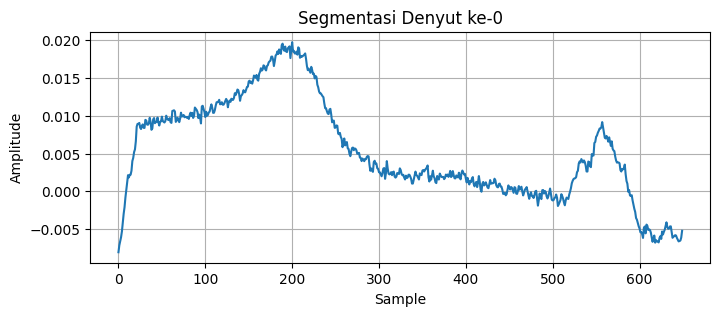

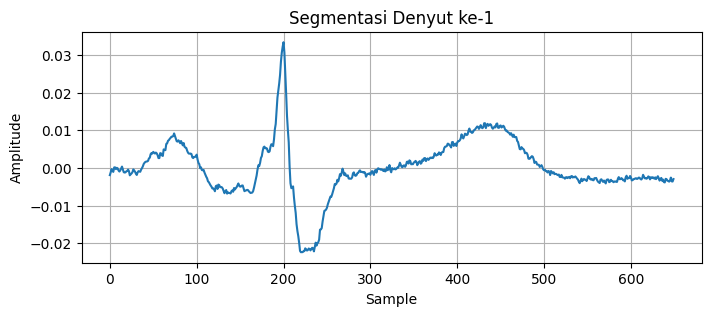

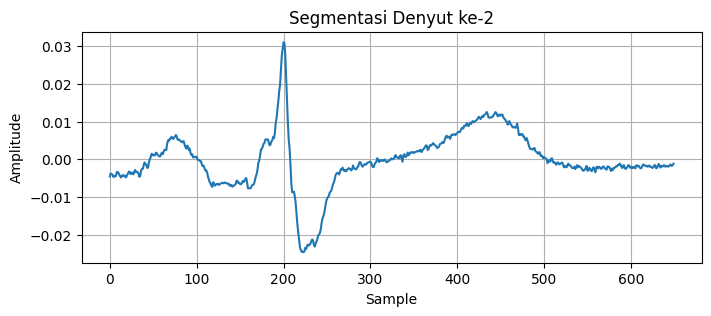

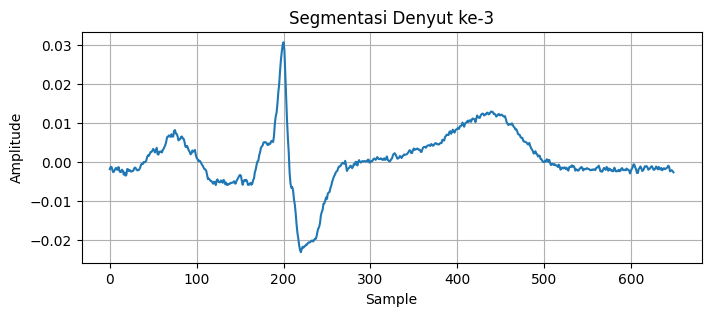

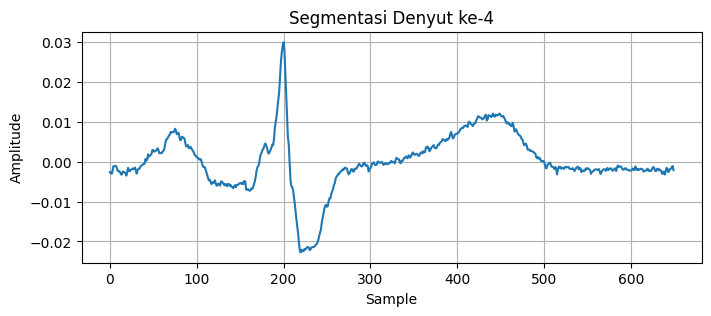

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statistics import mean
import os

def detect_r_peaks_and_segment(ecg, fs=1000, pre_samples=200, post_samples=450, save_dir=None, filename_prefix="segment"):
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)

    signal_abs = np.abs(ecg)
    distance = int(0.3 * fs)  # minimal 300 ms between peak
    candidate_peaks, _ = find_peaks(signal_abs, distance=distance)

    r_peaks = []
    noise_peaks = []
    rr_intervals = []
    SPKI = max(signal_abs) * 0.5
    NPKI = mean(signal_abs) * 0.5
    threshold_I1 = 0
    threshold_I2 = 0
    recent_rr = []

    for idx, peak in enumerate(candidate_peaks):
        peak_val = signal_abs[peak]

        threshold_I1 = NPKI + 0.25 * (SPKI - NPKI)
        threshold_I2 = 0.5 * threshold_I1

        if peak_val > threshold_I1:
            if len(r_peaks) == 0 or (peak - r_peaks[-1]) > 0.36 * fs:
                r_peaks.append(peak)
                SPKI = 0.125 * peak_val + 0.875 * SPKI
                if len(r_peaks) >= 2:
                    rr_interval = peak - r_peaks[-2]
                    rr_intervals.append(rr_interval)
                    recent_rr = rr_intervals[-8:]
        else:
            noise_peaks.append(peak)
            NPKI = 0.125 * peak_val + 0.875 * NPKI

        # Recovery mode
        if len(r_peaks) > 0 and len(recent_rr) >= 1:
            last_rr = np.mean(recent_rr)
            if (peak - r_peaks[-1]) > 1.5 * last_rr:
                if peak_val > threshold_I2 and (peak - r_peaks[-1]) > 0.36 * fs:
                    r_peaks.append(peak)
                    SPKI = 0.25 * peak_val + 0.75 * SPKI
                    rr_intervals.append(peak - r_peaks[-2])
                    recent_rr = rr_intervals[-8:]

    r_peaks = np.array(r_peaks)

    # ========== Beat Segmentation ==========
    segments = []
    for i, r in enumerate(r_peaks):
        start = r - pre_samples
        end = r + post_samples

        if start >= 0 and end <= len(ecg):
            beat = ecg[start:end]
            segments.append(beat)

            if save_dir is not None:
                np.save(os.path.join(save_dir, f"{filename_prefix}_beat_{i}.npy"), beat)
        else:
            print(f"Skipping beat {i}: out of bounds (start={start}, end={end})")

    return r_peaks, segments

# ========== Main ==========

file_path = r'D:\TA_baru\dataset\all_Label_preprocessed\anterior\patient002_s0015lre.npy'
data = np.load(file_path)
lead = data[:, 1]  # channel 1 (Lead II)

# Deteksi R-peak dan segmentasi denyut
r_peaks, segments = detect_r_peaks_and_segment(lead, fs=1000)

print(f"Jumlah R-peak terdeteksi: {len(r_peaks)}")
print(f"Jumlah segmentasi denyut: {len(segments)}")

# Visualisasi contoh 5 denyut pertama
for i in range(min(5, len(segments))):
    plt.figure(figsize=(8, 3))
    plt.plot(segments[i])
    plt.title(f"Segmentasi Denyut ke-{i}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()



# Feature Extraction

In [ ]:
import numpy as np

def extract_morphological_features_custom(ecg, r_peaks, fs=1000):
    rr_intervals = []
    qr_intervals = []
    st_segments = []
    q_amplitudes = []
    r_amplitudes = []

    for i in range(1, len(r_peaks)-1): 
        r_loc = r_peaks[i]

        # RR interval (Seconds)
        rr_interval = (r_peaks[i+1] - r_loc) / fs

        # Find Q-wave (50 ms Before R)
        search_window_q = ecg[max(0, r_loc - int(0.05*fs)) : r_loc]
        if len(search_window_q) > 0:
            q_rel_loc = np.argmin(search_window_q)
            q_loc = r_loc - (len(search_window_q) - q_rel_loc)
        else:
            q_loc = r_loc

        # find S-wave ( 50 ms after R)
        search_window_s = ecg[r_loc : min(len(ecg), r_loc + int(0.05*fs))]
        if len(search_window_s) > 0:
            s_rel_loc = np.argmin(search_window_s)
            s_loc = r_loc + s_rel_loc
        else:
            s_loc = r_loc

        # QR interval (Seconds)
        qr_interval = (r_loc - q_loc) / fs

        # ST Segment (from S to 120 ms After S)
        st_segment = (int(0.12 * fs)) / fs  # Asumption stay 120 ms

        # Q-wave amplitude
        q_amp = ecg[q_loc]

        # R-wave amplitude
        r_amp = ecg[r_loc]

        # Save semua fitur
        rr_intervals.append(rr_interval)
        qr_intervals.append(qr_interval)
        st_segments.append(st_segment)
        q_amplitudes.append(q_amp)
        r_amplitudes.append(r_amp)

    features = np.array([
        rr_intervals,
        qr_intervals,
        st_segments,
        q_amplitudes,
        r_amplitudes
    ]).T  # Transpose into shape (Beat count, 5 Feature)

    feature_names = [
        "RR Interval (s)",
        "QR Interval (s)",
        "ST Segment (s)",
        "Q-wave Amplitude",
        "R-wave Amplitude"
    ]

    return features, feature_names

# ======== Main ==========

file_path = r'D:\TA_baru\dataset\all_Label_preprocessed\anterior\patient002_s0015lre.npy'
data = np.load(file_path)
lead = data[:, 1]  

# R-peak Detection
r_peaks, _ = detect_r_peaks(lead)

# Extracting Feature
features, feature_names = extract_morphological_features_custom(lead, r_peaks)

print("Feature names:", feature_names)
print("Shape fitur:", features.shape)
print("Contoh fitur beat pertama:", features[0])


Feature names: ['RR Interval (s)', 'QR Interval (s)', 'ST Segment (s)', 'Q-wave Amplitude', 'R-wave Amplitude']
Shape fitur: (150, 5)
Contoh fitur beat pertama: [ 7.26000000e-01  3.80000000e-02  1.20000000e-01 -2.17385692e+02
  1.09361835e+03]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statistics import mean
import os

def detect_r_peaks(ecg, fs=1000):
    signal_abs = np.abs(ecg)
    distance = int(0.3 * fs)
    candidate_peaks, _ = find_peaks(signal_abs, distance=distance)

    r_peaks = []
    noise_peaks = []
    rr_intervals = []
    SPKI = max(signal_abs) * 0.5
    NPKI = mean(signal_abs) * 0.5
    threshold_I1 = 0
    threshold_I2 = 0
    recent_rr = []

    for idx, peak in enumerate(candidate_peaks):
        peak_val = signal_abs[peak]
        threshold_I1 = NPKI + 0.25 * (SPKI - NPKI)
        threshold_I2 = 0.5 * threshold_I1

        if peak_val > threshold_I1:
            if len(r_peaks) == 0 or (peak - r_peaks[-1]) > 0.36 * fs:
                r_peaks.append(peak)
                SPKI = 0.125 * peak_val + 0.875 * SPKI
                if len(r_peaks) >= 2:
                    rr_interval = peak - r_peaks[-2]
                    rr_intervals.append(rr_interval)
                    recent_rr = rr_intervals[-8:]
        else:
            noise_peaks.append(peak)
            NPKI = 0.125 * peak_val + 0.875 * NPKI

        if len(r_peaks) > 0 and len(recent_rr) >= 1:
            last_rr = np.mean(recent_rr)
            if (peak - r_peaks[-1]) > 1.5 * last_rr:
                if peak_val > threshold_I2 and (peak - r_peaks[-1]) > 0.36 * fs:
                    r_peaks.append(peak)
                    SPKI = 0.25 * peak_val + 0.75 * SPKI
                    rr_intervals.append(peak - r_peaks[-2])
                    recent_rr = rr_intervals[-8:]

    return np.array(r_peaks)

def extract_features(segment, fs=1000):
    r_index = np.argmax(segment)  # R peak location in segment
    q_index = np.argmin(segment[:r_index]) if r_index > 0 else 0  # Q wave before R
    q_amplitude = segment[q_index]
    r_amplitude = segment[r_index]
    
    qr_interval = (r_index - q_index) / fs * 1000  # ms
    
    # ST segment 150ms after R
    st_start = r_index + int(0.15 * fs)
    if st_start < len(segment):
        st_segment_value = np.mean(segment[st_start: st_start + int(0.08 * fs)])  # 80ms window
    else:
        st_segment_value = np.nan

    return st_segment_value, qr_interval, q_amplitude, r_amplitude

# ======== Main ==========

base_folder = r'D:\TA_baru\dataset\all_Label_preprocessed'
output = []

fs = 1000
pre_samples = 200 # pre sample:  200 sample before R-peak detected
post_samples = 450 # post sample:  450 sample after R-peak detected

for label_folder in os.listdir(base_folder):
    label_path = os.path.join(base_folder, label_folder)
    if not os.path.isdir(label_path):
        continue

    for file_name in os.listdir(label_path):
        if not file_name.endswith('.npy'):
            continue

        file_path = os.path.join(label_path, file_name)
        try:
            data = np.load(file_path)
            if data.shape[1] < 12:
                print(f"File {file_name} don't have 12 lead, skip...")
                continue

            # Gunakan lead 8 (Lead II) untuk deteksi R-peak
            lead_for_rpeak = data[:, 8]
            r_peaks = detect_r_peaks(lead_for_rpeak, fs=fs)

            if len(r_peaks) == 0:
                print(f"none R-peak detected in file {file_name}")
                continue

            for idx, r in enumerate(r_peaks):
                start = r - pre_samples
                end = r + post_samples

                if start < 0 or end > len(lead_for_rpeak):
                    continue  # Skip if it out of bound

                feature_row = {
                    "segment_id": f"{file_name}_beat{idx}",
                    "label": label_folder,
                }

                # RR-interval
                if idx == 0:
                    feature_row["rr_interval"] = np.nan
                else:
                    feature_row["rr_interval"] = (r - r_peaks[idx-1]) / fs * 1000  # ms

                # for 12 lead
                for lead_num in range(12):
                    segment = data[start:end, lead_num]

                    st_segment, qr_interval, q_amp, r_amp = extract_features(segment, fs=fs)

                    feature_row[f"lead{lead_num+1}_st_segment"] = st_segment
                    feature_row[f"lead{lead_num+1}_qr_interval"] = qr_interval
                    feature_row[f"lead{lead_num+1}_q_amplitude"] = q_amp
                    feature_row[f"lead{lead_num+1}_r_amplitude"] = r_amp

                output.append(feature_row)

        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Make a dataframe
df = pd.DataFrame(output)

# save into an Excel
save_path = r'D:\TA_baru\dataset\all_label_extracted_features.xlsx'
df.to_excel(save_path, index=False)

print("Extraction finish. Data saved in:", save_path)


Ekstraksi selesai. Data tersimpan di: D:\TA_baru\dataset\all_label_extracted_features.xlsx
